<a href="https://colab.research.google.com/github/sejallotliker/Machine_learning_practice/blob/main/Ridge_and_lasso_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ridge and lasso regression in sklearn

In [67]:
from sklearn.datasets import load_breast_cancer

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [68]:
df = load_breast_cancer()

In [69]:
df

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [70]:
dataset = pd.DataFrame(df.data)
print(dataset.head())

      0      1       2       3        4        5   ...      24      25      26      27      28       29
0  17.99  10.38  122.80  1001.0  0.11840  0.27760  ...  0.1622  0.6656  0.7119  0.2654  0.4601  0.11890
1  20.57  17.77  132.90  1326.0  0.08474  0.07864  ...  0.1238  0.1866  0.2416  0.1860  0.2750  0.08902
2  19.69  21.25  130.00  1203.0  0.10960  0.15990  ...  0.1444  0.4245  0.4504  0.2430  0.3613  0.08758
3  11.42  20.38   77.58   386.1  0.14250  0.28390  ...  0.2098  0.8663  0.6869  0.2575  0.6638  0.17300
4  20.29  14.34  135.10  1297.0  0.10030  0.13280  ...  0.1374  0.2050  0.4000  0.1625  0.2364  0.07678

[5 rows x 30 columns]


In [71]:
dataset.columns = df.feature_names
print(dataset.head())

   mean radius  mean texture  ...  worst symmetry  worst fractal dimension
0        17.99         10.38  ...          0.4601                  0.11890
1        20.57         17.77  ...          0.2750                  0.08902
2        19.69         21.25  ...          0.3613                  0.08758
3        11.42         20.38  ...          0.6638                  0.17300
4        20.29         14.34  ...          0.2364                  0.07678

[5 rows x 30 columns]


In [72]:
df.target.shape

(569,)

In [73]:
dataset['target']=df.target
dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [74]:
X = dataset.iloc[:, :-1] ##independent features
y = dataset.iloc[:, -1] ##dependent features

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#Linear regression

In [76]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

lin_regressor = LinearRegression()
lin_regressor.fit(X_train, y_train)
mse_train =cross_val_score(lin_regressor, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
mean_mse = np.mean(mse_train)
print(mean_mse)

-0.06274287601076642


#Ridge regression

In [77]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
parameters = { 'alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5, 10,
                         20, 30, 35, 40, 45, 50, 55, 100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(X_train, y_train)

y_hat_ridge = ridge_regressor.predict(X_test)


In [78]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 0.001}
-0.0613957626668978


#Lasso regression

In [79]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso = Lasso()
parameters = { 'alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5, 10,
                         20, 30, 35, 40, 45, 50, 55, 100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X, y)

y_hat_lasso = lasso_regressor.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.059e+01, tolerance: 9.843e-03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.132e+01, tolerance: 1.046e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.211e+01, tolerance: 1.070e

In [80]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1e-08}
-0.06329408379442765


<ipython-input-81-c11f71fbb9b1>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_hat_lasso)


<Axes: ylabel='Density'>

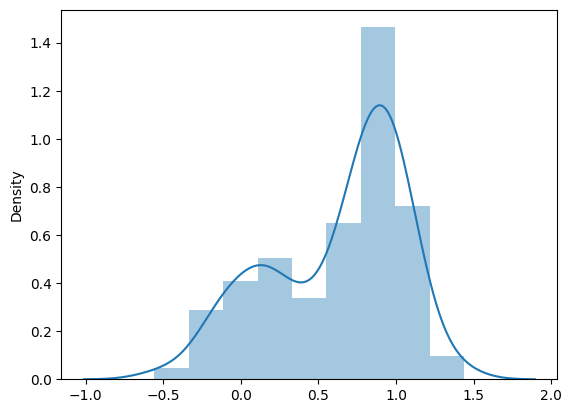

In [81]:
import seaborn as sns
sns.distplot(y_hat_lasso)

<ipython-input-88-edda7a0b82a3>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_hat_ridge)


<Axes: ylabel='Density'>

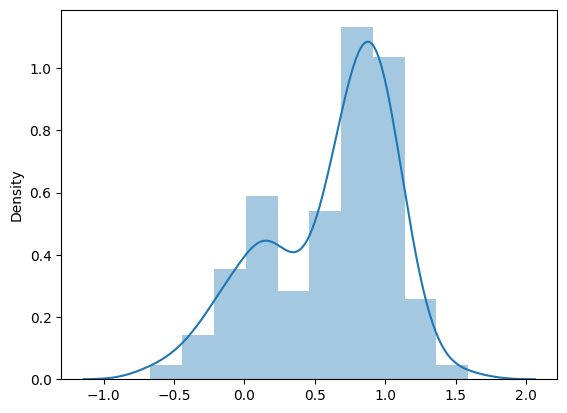

In [88]:
sns.distplot(y_hat_ridge)